# Prison Break

Prison break! In movies and on television, one of the most exciting ways to escape from prison is by helicopter, but does it actually happen? According to this Wikipedia page (https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes), it does. But how common is it and in what countries does it happen the most? In the following analysis, we'll explore the number of attempts made per year since 1971 as well as which countries have the most attempts and in which countries the success rate has been the highest.

We'll work with a dataset of helicopter prison escapes https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes#Actual_attempts) ! 

# Setting up the data

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes'
escapes = pd.read_html(url)[1]
print(escapes.shape)
escapes.head()

(48, 6)


,Date,Prison name,Country,Succeeded,Escapee(s),Details
0,"August 19, 1971",Santa Martha Acatitla,Mexico,Yes,Joel David Kaplan Carlos Antonio Contreras Castro,Joel David Kaplan was a New York businessman w...
1,"October 31, 1973",Mountjoy Jail,Ireland,Yes,JB O'Hagan Seamus TwomeyKevin Mallon,"On October 31, 1973, an IRA member hijacked a ..."
2,"May 24, 1978","United States Penitentiary, Marion",United States,No,Garrett Brock TrapnellMartin Joseph McNallyJam...,43-year-old Barbara Ann Oswald hijacked a Sain...
3,"February 27, 1981","Fleury-Mérogis, Essonne, Ile de France",France,Yes,Gérard DupréDaniel Beaumont,"With the help of Serge Coutel, Gérard Dupré an..."
4,"May 7, 1981","Orsainville Prison, Quebec City",Canada,No,Marina Paquet (hijacker)Giles Arseneault (pris...,Marina Paquet held a sawed off shotgun against...


In [3]:
escapes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         48 non-null     object
 1   Prison name  48 non-null     object
 2   Country      48 non-null     object
 3   Succeeded    48 non-null     object
 4   Escapee(s)   48 non-null     object
 5   Details      48 non-null     object
dtypes: object(6)
memory usage: 2.4+ KB


In [4]:
escapes.isnull().sum()

Date           0
Prison name    0
Country        0
Succeeded      0
Escapee(s)     0
Details        0
dtype: int64

# Removing the Details


Based on our data we can see that most of the information comes from teh detail column. This detail column only contains information on how the escape had happened. In the overall picture, this column does would not be all that useful to use so we will remove this column from our dataset.

In [5]:
cleaned_escapes=escapes.drop('Details',axis=1)
cleaned_escapes.head()

,Date,Prison name,Country,Succeeded,Escapee(s)
0,"August 19, 1971",Santa Martha Acatitla,Mexico,Yes,Joel David Kaplan Carlos Antonio Contreras Castro
1,"October 31, 1973",Mountjoy Jail,Ireland,Yes,JB O'Hagan Seamus TwomeyKevin Mallon
2,"May 24, 1978","United States Penitentiary, Marion",United States,No,Garrett Brock TrapnellMartin Joseph McNallyJam...
3,"February 27, 1981","Fleury-Mérogis, Essonne, Ile de France",France,Yes,Gérard DupréDaniel Beaumont
4,"May 7, 1981","Orsainville Prison, Quebec City",Canada,No,Marina Paquet (hijacker)Giles Arseneault (pris...


# Extracting the Year

After cleaning our data, we can start doing our first analysis which would be to count the number of escapes that happened every year.

But before we do that we need to make that column into a datetime

In [6]:
cleaned_escapes['Date'] = pd.to_datetime(cleaned_escapes['Date'])

cleaned_escapes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         48 non-null     datetime64[ns]
 1   Prison name  48 non-null     object        
 2   Country      48 non-null     object        
 3   Succeeded    48 non-null     object        
 4   Escapee(s)   48 non-null     object        
dtypes: datetime64[ns](1), object(4)
memory usage: 2.0+ KB


In [7]:
cleaned_escapes['Year'] = cleaned_escapes['Date'].dt.year
cleaned_escapes

,Date,Prison name,Country,Succeeded,Escapee(s),Year
0,1971-08-19,Santa Martha Acatitla,Mexico,Yes,Joel David Kaplan Carlos Antonio Contreras Castro,1971
1,1973-10-31,Mountjoy Jail,Ireland,Yes,JB O'Hagan Seamus TwomeyKevin Mallon,1973
2,1978-05-24,"United States Penitentiary, Marion",United States,No,Garrett Brock TrapnellMartin Joseph McNallyJam...,1978
3,1981-02-27,"Fleury-Mérogis, Essonne, Ile de France",France,Yes,Gérard DupréDaniel Beaumont,1981
4,1981-05-07,"Orsainville Prison, Quebec City",Canada,No,Marina Paquet (hijacker)Giles Arseneault (pris...,1981
5,1983-01-01,Pentridge (HM Prison),Australia,No,David McMillan,1983
6,1985-12-19,"Perry Correctional Institution, Pelzer, South ...",United States,Yes,James Rodney LeonardWilliam Douglas BallewJess...,1985
7,1985-12-31,"Cândido Mendes penitentiary, Ilha Grande, Rio ...",Brazil,Yes,"José Carlos dos Reis Encina, a.k.a. ""Escadinha""",1985
8,1986-05-26,Prison de la Santé,France,Yes,Michel Vaujour,1986
9,1986-11-05,"Federal Correctional Institution, Dublin",United States,Yes,Samantha Lopez,1986


In [13]:
cleaned_escapes['Year'].value_counts().sort_index()

1971    1
1973    1
1978    1
1981    2
1983    1
1985    2
1986    3
1987    1
1988    1
1989    2
1990    1
1991    1
1992    2
1993    1
1996    1
1997    1
1999    1
2000    2
2001    3
2002    2
2003    1
2005    2
2006    1
2007    3
2009    3
2010    1
2012    1
2013    2
2014    1
2016    1
2018    1
2020    1
Name: Year, dtype: int64

Based on the values we see we can say that between 1973 and 2020 (there are a few years where there were nto ecapes attempted), there was at least 1 attempt. To make this easier to visualize we create a bar chart for this


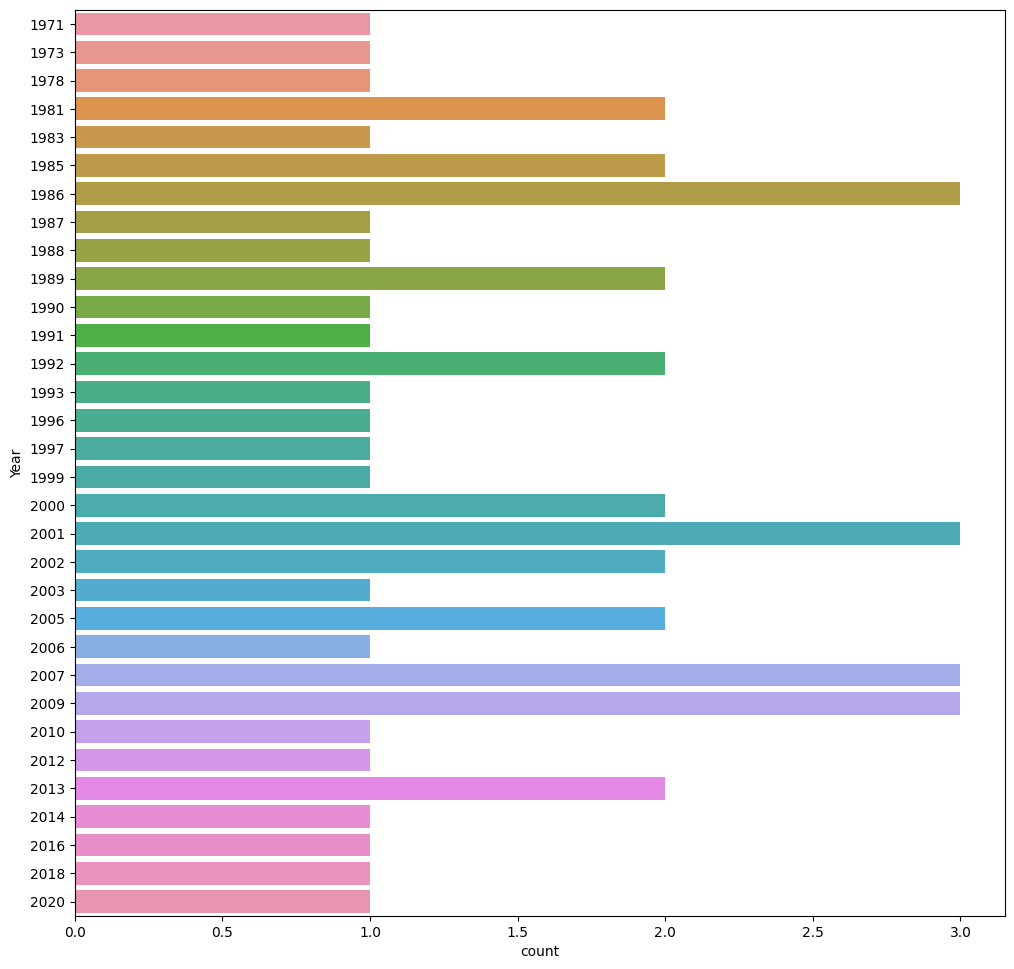

In [20]:
import seaborn as sns
plt.figure(figsize=(12,12))

sns.countplot(y=cleaned_escapes['Year'].sort_index())

Based on the above chart, it appears the years with the most attempts are a tie between 1986, 2001, 2007, and 2009, all with 3 attempts. 

We can also see that there missing years but these were excluded as those years there were no attempts in breaking out.

# Attempts by Country
Next, let's look at how the attempts have been distributed by country and then we will visulize it as well.

In [30]:
cleaned_escapes['Country'].value_counts().reset_index()

,index,Country
0,France,15
1,United States,8
2,Belgium,4
3,Greece,4
4,Canada,4
5,Australia,2
6,United Kingdom,2
7,Brazil,2
8,Puerto Rico,1
9,Chile,1


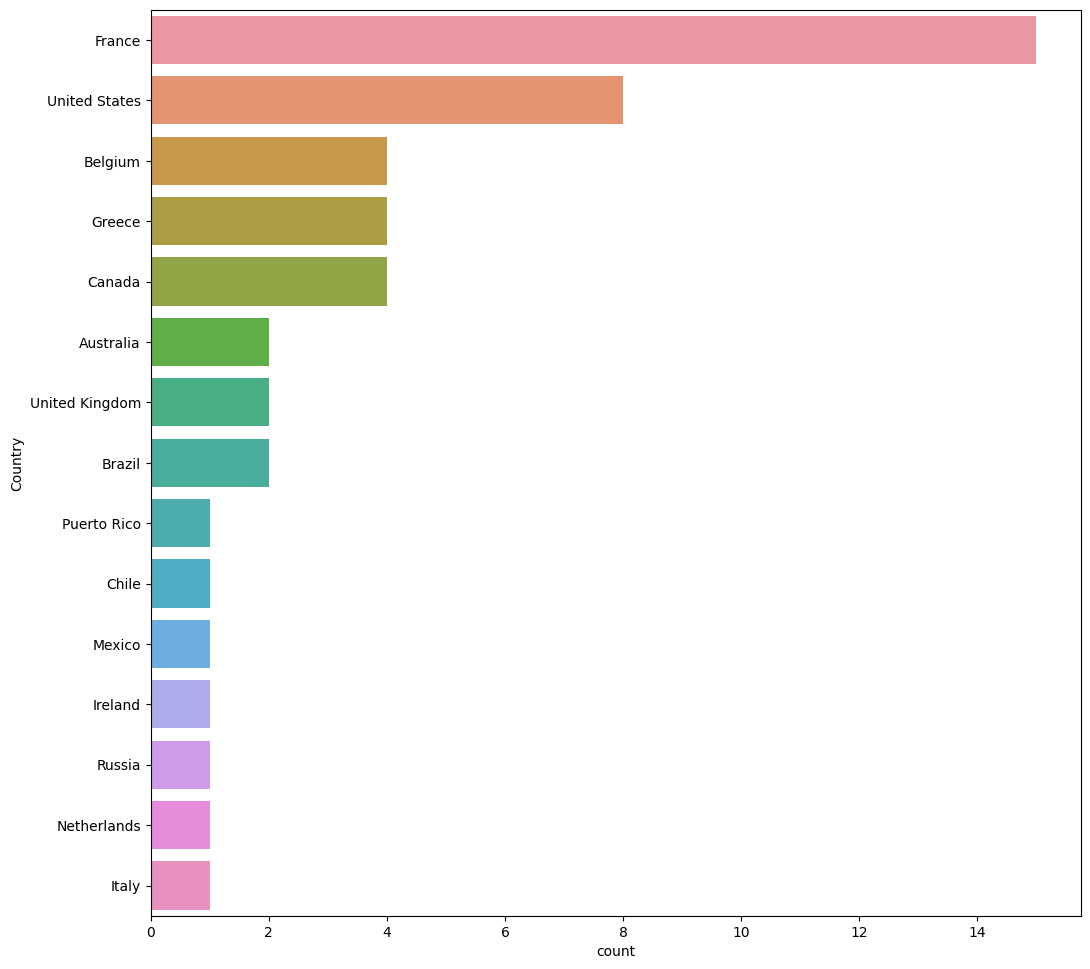

In [33]:
plt.figure(figsize=(12,12))

sns.countplot(y = 'Country',
              data = cleaned_escapes,
              order = cleaned_escapes['Country'].value_counts().index)

France is the clear leader with 15 attempts, followed by the US with 8. No other country in the list has more than 4 attempts.